# Lesson 1

## Classification

In [1]:
from fastai.vision.all import *

In [18]:
untar_data(URLs.PETS)

Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet')

In [19]:
path = untar_data(URLs.PETS) / 'images'
path

Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images')

In [20]:
def is_cat(x):
    return x[0].isupper()

In [21]:
images = get_image_files(path)
images

(#7390) [Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/german_shorthaired_108.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/Bengal_38.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_145.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/samoyed_115.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/american_bulldog_18.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/pomeranian_17.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/german_shorthaired_45.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_37.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/scottish_terrier_39.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/scottish_terrier_81.jpg')...]

In [22]:
images[0]

Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/german_shorthaired_108.jpg')

In [23]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224))
dls

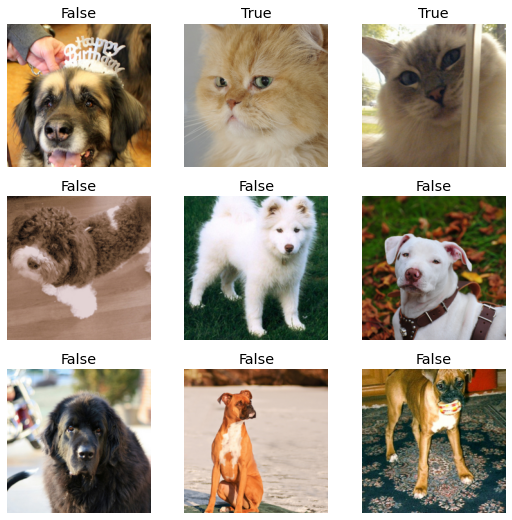

In [26]:
dls.show_batch()

In [24]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [25]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.164360,0.027804,0.008119,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.050143,0.012865,0.003383,00:19


In [27]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [29]:
type(uploader.data[0])

bytes

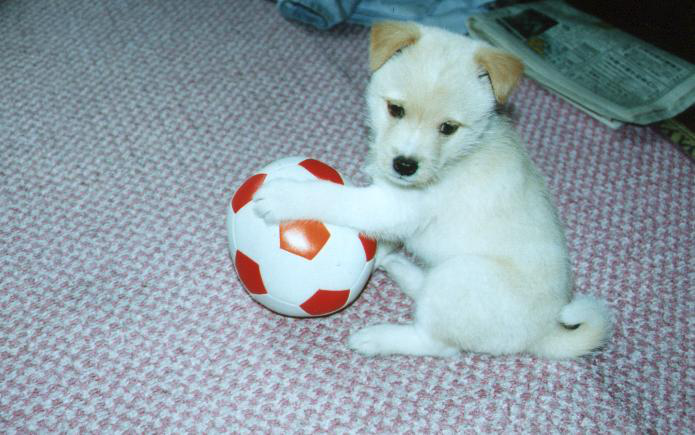

In [30]:
img = PILImage.create(uploader.data[0])
img

In [31]:
is_cat, _, probs = learn.predict(img)
print(f'Is this a cat?: {is_cat}.')
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000000


In [32]:
is_cat

'False'

In [33]:
probs

tensor([1.0000e+00, 2.2830e-08])

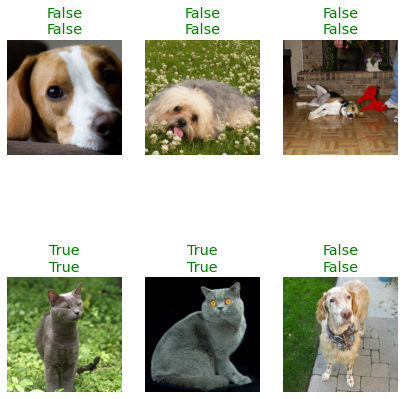

In [35]:
learn.show_results(max_n=6, figsize=(7, 8))

## Segmentation

In [2]:
untar_data(URLs.CAMVID_TINY)

Path('/home/koichiro_mori/.fastai/data/camvid_tiny')

In [3]:
path = untar_data(URLs.CAMVID_TINY)

In [6]:
images = get_image_files(path / 'images')
images

(#100) [Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/Seq05VD_f04530.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/Seq05VD_f02880.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/0006R0_f03330.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/0016E5_01260.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/0016E5_08089.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/0016E5_00720.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/Seq05VD_f02940.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/0016E5_08141.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/0016E5_01920.png'),Path('/home/koichiro_mori/.fastai/data/camvid_tiny/images/Seq05VD_f01080.png')...]

In [8]:
label_func = lambda o: path / 'labels' / f'{o.stem}_P{o.suffix}'
label_func(images[0])

Path('/home/koichiro_mori/.fastai/data/camvid_tiny/labels/Seq05VD_f04530_P.png')

In [10]:
codes = np.loadtxt(path / 'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [11]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path / 'images'),
    label_func=lambda o: path / 'labels' / f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path / 'codes.txt', dtype=str))

In [12]:
dls

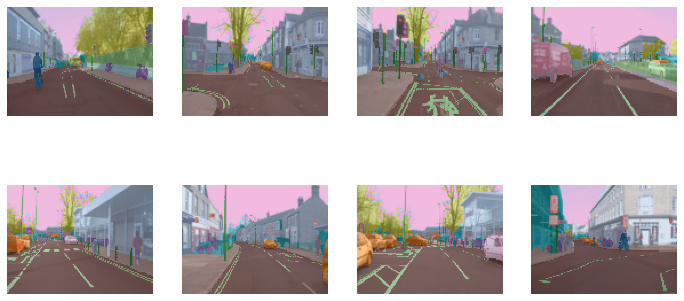

In [15]:
dls.show_batch()

In [13]:
learn = unet_learner(dls, resnet34)

In [14]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.776770,2.323460,00:02


epoch,train_loss,valid_loss,time
0,2.056077,1.701393,00:02
1,1.750142,1.197281,00:02
2,1.552088,1.133577,00:02
3,1.428898,1.019737,00:02
4,1.293950,0.789044,00:02
5,1.166815,0.727793,00:02
6,1.063543,0.711465,00:02
7,0.982809,0.709147,00:02


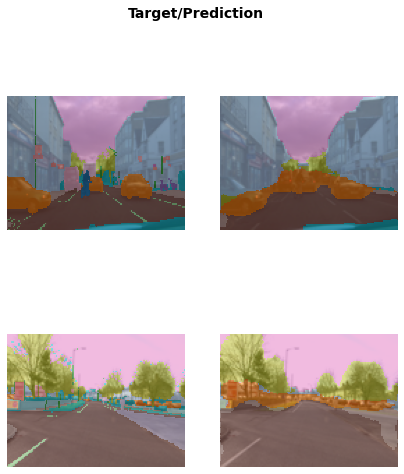

In [17]:
learn.show_results(max_n=6, figsize=(7, 8))

## Text

In [3]:
from fastai.text.all import *

In [4]:
untar_data(URLs.IMDB)

Path('/home/koichiro_mori/.fastai/data/imdb')

In [5]:
doc(TextDataLoaders)

/home/koichiro_mori/.pyenv/versions/3.8.6/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


class TextDataLoaders [source] TextDataLoaders ( * loaders , path = '.' , device = None ) :: DataLoaders 
 
 Basic wrapper around several DataLoader s with factory methods for NLP problems 
 Show in docs

In [ ]:
!pip install spacy==2.3.5

In [7]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
dls

In [8]:
dls.show_batch()

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german xxunk by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",pos
1,"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of oatmeal . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj vargas became i was always aware that something did n't quite feel right . xxmaj victor xxmaj vargas suffers from a certain overconfidence on the director 's part . xxmaj apparently , the director thought that the ethnic backdrop of a xxmaj latino family on the lower east side , and an idyllic storyline would make the film critic proof . xxmaj he was right , but it did n't fool me . xxmaj raising xxmaj victor xxmaj vargas is",neg
2,"xxbos xxmaj berlin - born in 1942 xxmaj margarethe von xxmaj trotta was an actress and now she is a very important director and writer . xxmaj she has been described , perhaps even unfairly caricatured , as a director whose commitment to bringing a woman 's sensibility to the screen outweighs her artistic strengths . "" rosenstrasse , "" which has garnered mixed and even strange reviews ( the xxmaj new xxmaj york xxmaj times article was one of the most negatively aggressive reviews xxmaj i 've ever read in that paper ) is not a perfect film . xxmaj it is a fine movie and a testament to a rare xxunk of successful opposition to the genocidal xxmaj nazi regime by , of all peoples , generically powerless xxmaj germans demonstrating in a xxmaj berlin street . \n\n xxmaj co - writer von xxmaj trotta uses the actual",pos
3,"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with the oddest possible scenarios to get the two protagonists together in the end . xxmaj in fact , all its charm is innate , contained within the characters and the setting and the plot … which is highly believable to boot . xxmaj it 's easy to think that such a love story , as beautiful as any other ever told , * could * happen to you … a feeling you do n't often get from other romantic comedies",pos
4,"xxbos xxmaj in xxup nyc , seaman xxmaj michael o'hara ( orson xxmaj welles ) rescues xxmaj elsa xxmaj bannister ( rita xxmaj hayworth ) from a mugging & rape as she takes a horse & carriage through xxmaj central xxmaj park -and lives to regret it . xxmaj xxunk - haired xxmaj hayworth 's a platinum blonde in this one ; as dazzling as fresh - fallen snow -but nowhere near as pure … \n\n xxmaj to reveal any more of the convoluted plot in this seminal "" noir "" would be criminal . xxmaj it 's as deceptive as the mirrors used to cataclysmic effect in the final scenes -but the film holds far darker secrets : xxmaj from the xxup ny xxmaj times : "" childhood xxmaj shadows : xxmaj the xxmaj hidden xxmaj story xxmaj of xxmaj the xxmaj black xxmaj dahlia xxmaj murder "" by",pos
5,"xxbos xxmaj god ! xxmaj zor

In [10]:
AWD_LSTM

fastai.text.models.awdlstm.AWD_LSTM

In [14]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [15]:
doc(text_classifier_learner)

text_classifier_learner [source] text_classifier_learner ( dls , arch , seq_len = 72 , config = None , backwards = False , pretrained = True , drop_mult = 0.5 , n_out = None , lin_ftrs = None , ps = None , max_len = 1440 , y_range = None , loss_func = None , opt_func = Adam , lr = 0.001 , splitter = trainable_params , cbs = None , metrics = None , path = None , model_dir = 'models' , wd = None , wd_bn_bias = False , train_bn = True , moms = (0.95, 0.85, 0.95) ) 
 
 Create a Learner with a text classifier from dls and arch . 
 Show in docs

In [16]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.457901,0.397720,0.821240,01:22


epoch,train_loss,valid_loss,accuracy,time
0,0.308260,0.243155,0.900240,02:36
1,0.248169,0.210799,0.911760,02:36
2,0.182107,0.208075,0.920000,02:35
3,0.141401,0.196677,0.927040,02:36


In [24]:
learn.predict('I really liked that movie!')

('pos', tensor(1), tensor([0.0013, 0.9987]))

In [27]:
learn.predict('bad movie')

('neg', tensor(0), tensor([0.5090, 0.4910]))

In [29]:
learn.show_results()

,text,category,category_
0,"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n\n * major xxup spoilers xxup ahead * \n\n ( but you already knew that , did n't you ? ) \n\n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , xxmaj i 'd like to contribute my interpretation of why the plot makes perfect sense . xxmaj as others have pointed out , one single viewing of this movie is not sufficient . xxmaj if you have the xxup dvd of xxup md , you can "" cheat "" by looking at xxmaj david xxmaj lynch 's "" top 10 xxmaj hints to xxmaj unlocking xxup md "" ( but only upon second or third viewing , please . ) ;) \n\n xxmaj first of all , xxmaj mulholland xxmaj drive is",pos,pos
1,"xxbos xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , is n't much different at all from the previous games ( excluding xxmaj tony xxmaj hawk 3 ) . xxmaj the only thing new that is featured in xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , is the new selection of levels , and tweaked out graphics . xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x offers a new career mode , and that is the 2x career . xxmaj the 2x career is basically xxmaj tony xxmaj hawk 1 career , because there is only about five challenges per level . xxmaj if you missed xxmaj tony xxmaj hawk 1 and 2 , i suggest that you buy xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , but if you have played the first two games , you should still",pos,pos
2,"xxbos xxmaj hollywood movies since the 1930s have treated gays as lepers . xxmaj in condemning homosexuality , the film industry has reflected only what the repressive society of its day espoused as an ideology . xxmaj for example , in the 1962 xxmaj otto xxmaj preminger melodrama "" advise and xxmaj consent , "" straight actor xxmaj don xxmaj murray was cast as a queer congressman who commits suicide rather than confess his alternative lifestyle . xxmaj gay movie characters have covered a lot of ground since "" advise and xxmaj consent . "" xxmaj in the 1997 movie "" in & xxmaj out , "" ( * * 1 / 2 out of xxrep 4 * ) , heterosexual actor xxmaj kevin xxmaj kline is cast as a homosexual teacher who comes out of the closet on his wedding day . xxmaj while the conservative xxmaj hollywood of",pos,pos
3,"xxbos "" empire xxmaj strikes xxmaj back "" director xxmaj irvin xxmaj kershner 's "" never xxmaj say xxmaj never xxmaj again , "" a remake of the 1965 xxmaj james xxmaj bond movie "" thunderball , "" does n't surpasses the xxmaj terence xxmaj young original , but this non - harry xxmaj saltzman & xxmaj albert xxup r. xxmaj broccoli film is well worth watching if you call yourself a 007 aficionado . xxmaj nevertheless , despite its shortage of clever gadgets and the lack of a vibrant musical score , "" never xxmaj say xxmaj never xxmaj again "" rates as an above - average , suspenseful doomsday thriller with top - flight performances by a seasoned cast including xxmaj sean xxmaj connery , xxmaj kim xxmaj basinger , xxmaj klaus xxmaj maria xxmaj brandauer , xxmaj max xxmaj von xxmaj sydow , xxmaj barbara xxmaj carrera",pos,neg
4,"xxbos xxmaj during an eight - year stretch of the 1980s when xxmaj charles xxmaj bronson made nine films , only one was released by a company other than the xxmaj cannon xxmaj group : ' the xxmaj evil xxmaj that xxmaj men xxmaj do , ' a tristar xxmaj films pickup from xxmaj sir xxmaj lew xxmaj grade 's xxup itc xxmaj entertainment firm . xxmaj bronson was already in the thick of his collaborations with director xxup j. xxmaj lee xxmaj thompson , which ran through numerous actioners until ' kinjite : xxmaj forbidden xxmaj subjects ' in 1989 . \n\n xxmaj expectations should run pretty high with xxmaj bronson and xxmaj thompson working for a better - funded outfit like xxup itc , but ' the xxmaj evil xxmaj that xxmaj man xxmaj do ' is a great disappointment on many levels . xxmaj while still from",neg,neg
5,"xxbos xxmaj may 2nd : someone cli

## Tabular

In [30]:
from fastai.tabular.all import *

In [32]:
path = untar_data(URLs.ADULT_SAMPLE)
path

Path('/home/koichiro_mori/.fastai/data/adult_sample')

In [33]:
dls = TabularDataLoaders.from_csv(
    path / 'adult.csv',
    path=path,
    y_names='salary',
    cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names=['age', 'fnlwgt', 'education-num'],
    procs=[Categorify, FillMissing, Normalize])

In [34]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,False,48.0,85340.998983,13.0,<50k
1,Private,Some-college,Never-married,Adm-clerical,Unmarried,White,False,34.0,154548.001409,10.0,<50k
2,Private,Bachelors,Married-civ-spouse,Sales,Wife,White,False,42.0,156579.999174,13.0,<50k
3,?,HS-grad,Never-married,?,Own-child,White,False,19.0,37332.003206,9.0,<50k
4,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,False,30.0,168334.000022,9.0,<50k
5,Self-emp-not-inc,Masters,Divorced,Sales,Unmarried,White,False,41.0,438695.997867,14.0,>=50k
6,Private,5th-6th,Never-married,Transport-moving,Not-in-family,White,False,26.0,337939.999541,3.0,<50k
7,Private,Bachelors,Divorced,Exec-managerial,Not-in-family,White,False,39.0,198097.000262,13.0,<50k
8,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,False,42.0,210524.999787,10.0,>=50k
9,State-gov,Assoc-voc,Never-married,Prof-specialty,Not-in-family,White,False,37.0,367236.997251,11.0,>=50k


In [40]:
learn = tabular_learner(dls, metrics=accuracy)

In [41]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.357897,0.375664,0.825860,00:04
1,0.362552,0.362429,0.829085,00:04
2,0.338207,0.360705,0.834767,00:04


In [42]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,12.0,3.0,4.0,1.0,5.0,1.0,0.247108,-0.425938,-0.421893,0.0,0.0
1,5.0,12.0,3.0,4.0,1.0,5.0,1.0,0.612397,-0.190925,-0.421893,1.0,0.0
2,5.0,4.0,6.0,10.0,3.0,5.0,1.0,1.123802,-0.043937,-3.163392,0.0,0.0
3,5.0,15.0,3.0,11.0,1.0,5.0,1.0,0.539339,-1.529884,1.927964,1.0,1.0
4,5.0,16.0,1.0,2.0,5.0,5.0,1.0,-0.994876,0.114456,-0.030250,0.0,0.0
5,7.0,6.0,3.0,6.0,1.0,5.0,1.0,1.123802,-1.506270,-2.380107,0.0,0.0
6,5.0,1.0,3.0,8.0,1.0,5.0,1.0,0.100992,-0.983637,-1.596821,1.0,0.0
7,7.0,12.0,1.0,4.0,2.0,5.0,1.0,-0.118182,0.489863,-0.421893,0.0,0.0
8,5.0,12.0,5.0,7.0,2.0,5.0,1.0,-1.360165,0.495983,-0.421893,0.0,0.0


## Collaborative Filtering

In [43]:
from fastai.collab import *

In [45]:
path = untar_data(URLs.ML_SAMPLE)
path

Path('/home/koichiro_mori/.fastai/data/movie_lens_sample')

In [46]:
dls = CollabDataLoaders.from_csv(path / 'ratings.csv')
dls

In [47]:
dls.show_batch()

,userId,movieId,rating
0,481,1097,4.5
1,652,316,5.0
2,598,2028,4.0
3,388,590,5.0
4,299,592,4.0
5,475,2571,5.0
6,463,1197,4.0
7,652,3793,4.0
8,430,364,5.0
9,134,4306,4.0


In [48]:
doc(CollabDataLoaders)

class CollabDataLoaders [source] CollabDataLoaders ( * loaders , path = '.' , device = None ) :: DataLoaders 
 
 Base DataLoaders for collaborative filtering. 
 Show in docs

In [49]:
learn = collab_learner(dls, y_range=(0.5, 5.5))

In [50]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.487287,1.479105,00:00


epoch,train_loss,valid_loss,time
0,1.375014,1.419205,00:00
1,1.260246,1.237124,00:00
2,1.025340,0.915223,00:00
3,0.787570,0.756840,00:00
4,0.685783,0.712491,00:00
5,0.630512,0.696390,00:00
6,0.621536,0.687923,00:00
7,0.594335,0.684612,00:00
8,0.586138,0.683168,00:00
9,0.598876,0.682995,00:00


In [51]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,74.0,67.0,3.0,4.172662
1,20.0,17.0,4.0,3.247623
2,2.0,74.0,3.0,3.591843
3,55.0,62.0,3.5,3.858162
4,63.0,85.0,1.5,3.035658
5,83.0,70.0,3.5,3.683742
6,25.0,16.0,3.0,3.617116
7,86.0,19.0,3.0,2.542247
8,70.0,96.0,4.5,3.983111
